In [189]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn modules for model building and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer

In [144]:
# Load the dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df["DEATH_EVENT"].value_counts())


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [146]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [148]:
df.shape

(299, 13)

In [150]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [152]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<h3> 📂 About the Dataset: Heart Failure Clinical Records</h3>
The dataset used in this project is the Heart Failure Clinical Records Dataset, which was originally published in an open-access research article on cardiovascular diseases. It contains information collected from 299 heart failure patients at the Fakir Mohan Medical College and Hospital, Odisha, India.

<h5>🔢 Dataset Summary:</h5>
Total Records: 299 patients

Total Features: 13 clinical attributes + 1 target variable (DEATH_EVENT)

<h5>🧬 Features:</h5>
The dataset includes a mix of continuous, categorical, and binary medical features:

Age: Age of the patient (in years)

Anaemia: Decrease of red blood cells (0 = no, 1 = yes)

Creatinine Phosphokinase (CPK): Level of CPK enzyme in the blood (mcg/L)

Diabetes: Whether the patient has diabetes (0 = no, 1 = yes)

Ejection Fraction: Percentage of blood leaving the heart at each contraction

High Blood Pressure: Whether the patient has hypertension (0 = no, 1 = yes)

Platelets: Platelet count in the blood (kiloplatelets/mL)

Serum Creatinine: Level of creatinine in the blood (mg/dL)

Serum Sodium: Sodium level in the blood (mEq/L)

Sex: Male or Female (1 = Male, 0 = Female)

Smoking: Whether the patient smokes (0 = no, 1 = yes)

Time: Follow-up period (in days)

<h5>DEATH_EVENT: </h5>Target variable indicating whether the patient died during the follow-up period (1 = death, 0 = survived)

<h5>🎯 Objective:</h5>
The goal of this dataset is to predict the DEATH_EVENT, helping in:

Early diagnosis

Clinical decision-making

Health risk prediction and prevention strategies



In [191]:
#  Splitting features (X) and target (y)
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]


In [193]:
#  Feature Scaling for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [195]:
# Split the dataset into training and test sets (80/20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [197]:
print("y_train class distribution:", np.unique(y_train, return_counts=True))
print("y_test class distribution:", np.unique(y_test, return_counts=True))


y_train class distribution: (array([0, 1], dtype=int64), array([162,  77], dtype=int64))
y_test class distribution: (array([0, 1], dtype=int64), array([41, 19], dtype=int64))


In [203]:
#  Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
# Define the hyperparameter grid for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#  Perform Randomized Search for hyperparameter tuning
rand_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [205]:
# Get the best model from randomized search
best_model = rand_search.best_estimator_
#  Make predictions on the test set
y_pred = best_model.predict(X_test)
#  Display the best hyperparameters
print("Best Hyperparameters:", rand_search.best_params_)
#  Calculate and display accuracy
# Detailed evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Accuracy: 0.85
ROC AUC Score: 0.7913992297817715
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



In [207]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.85


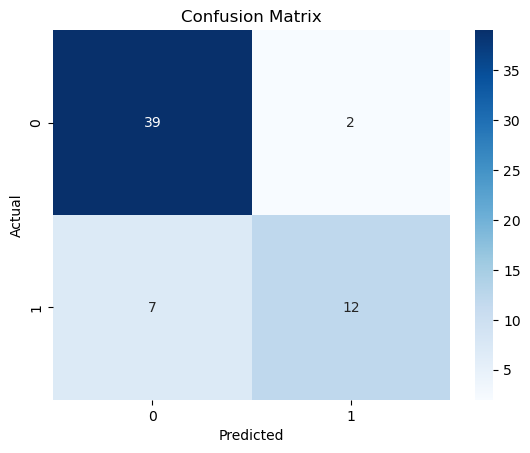

In [209]:
#  Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<h4>📊 Confusion Matrix Interpretation</h4>
The confusion matrix displayed above evaluates the performance of our Random Forest Classifier on the heart failure prediction task.


🧠 What It Tells Us:
✅ 39 patients actually survived and the model correctly predicted them as survived (True Negatives).

✅ 12 patients actually died and were correctly predicted by the model as died (True Positives).

❌ 2 patients survived but were incorrectly predicted as died (False Positives).

❌ 7 patients actually died but were predicted as survived (False Negatives).

🧾 Summary:
The model performs well in identifying survivors (very high TN).

It is also able to detect many of the actual death events, though there is room to reduce false negatives (FN = 7).

In healthcare scenarios, minimizing false negatives is important to avoid missing patients at high risk.

This matrix gives a comprehensive overview of how accurate and reliable the model's predictions are, and helps in improving the model further based on misclassifications.

<h5>## 💓 Heart Failure Mortality Prediction using Random Forest

This notebook builds a classification model to predict whether a patient is at risk of dying from heart failure using the Heart Failure Clinical Records dataset.

- **Preprocessing:** Standardization using `StandardScaler`
- **Model Used:** `RandomForestClassifier`
- **Optimization:** Hyperparameter tuning with `RandomizedSearchCV`
- **Evaluation Metrics:** Accuracy, ROC AUC Score, Classification Report, and Confusion Matrix

This model can assist doctors in early risk detection and clinical decision-making by identifying high-risk heart failure patients.
</h5>